In [1]:
import numpy as np
from netCDF4 import Dataset
import os
import glob
import re
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
folder_path = './monthly_data'
nc_files = glob.glob(os.path.join(folder_path, '*v2.0.nc'))

len(nc_files)


360

In [3]:
first_ds = Dataset(nc_files[0])
available_vars = list(first_ds.variables.keys())
print(f"사용 가능한 변수들: {available_vars}")
# SIC 변수 자동 찾기 (F11_ICECON, F13_ICECON, F17_ICECON 등)
sic_var_name = None
for var in available_vars:
    if 'ICECON' in var and var.startswith('F'):
        sic_var_name = var
        break

if sic_var_name is None:
    print("오류: SIC 변수를 찾을 수 없습니다!")
    print(f"사용 가능한 변수: {available_vars}")
else:
    print(f"발견된 SIC 변수: {sic_var_name}")

사용 가능한 변수들: ['crs', 'x', 'y', 'time', 'F11_ICECON']
발견된 SIC 변수: F11_ICECON


In [4]:
x = first_ds.variables['x'][:]  # (304,)
y = first_ds.variables['y'][:]  # (448,)
print(f"X 좌표 크기: {x.shape}")
print(f"Y 좌표 크기: {y.shape}")

X 좌표 크기: (304,)
Y 좌표 크기: (448,)


In [5]:
sic_var = first_ds.variables[sic_var_name]
print(f"SIC 변수 정보:")
print(f"  - 변수명: {sic_var_name}")
print(f"  - Shape: {sic_var.shape}")
print(f"  - Scale factor: {sic_var.scale_factor}")
print(f"  - Fill value: {sic_var._FillValue}")
print(f"  - Flag values: {sic_var.flag_values}")

first_ds.close()

SIC 변수 정보:
  - 변수명: F11_ICECON
  - Shape: (1, 448, 304)
  - Scale factor: 0.004
  - Fill value: 255
  - Flag values: [251 252 253 254]


In [6]:
sic_data_list = []
dates = []

for i, file_path in enumerate(nc_files):
    # NetCDF 파일 열기
    ds = Dataset(file_path)
    
    sic_var = None
    for var in ds.variables.keys():
        if 'ICECON' in var and var.startswith('F'):
            sic_var = var
            break

    sic_raw = ds.variables[sic_var][:]  # (1,448,304)

    # sic = sic_raw.astype('float32') * ds.variables[sic_var].scale_factor
    sic = sic_raw.astype('float32')
    sic[sic > 1] = 0

    sic = np.squeeze(sic, axis=0)

    sic_data_list.append(sic)

    basename = os.path.basename(file_path)
    date_match = re.search(r'(\d{6})', basename)
    date_str = date_match.group(1) if date_match else f"file_{i:03d}"
    dates.append(date_str)
    
    ds.close()

In [7]:
sic.data[:][150]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.016, 0.064, 0.04 , 0.032,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.036, 0.132, 0.252,
       0.244, 0.248, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [8]:
sic_data_list

[masked_array(
   data=[[0.0, 0.0, 0.0, ..., --, --, --],
         [0.0, 0.0, 0.0, ..., --, --, --],
         [0.0, 0.0, 0.0, ..., --, --, --],
         ...,
         [--, --, --, ..., 0.0, 0.0, 0.0],
         [--, --, --, ..., 0.0, 0.0, 0.0],
         [--, --, --, ..., 0.0, 0.0, 0.0]],
   mask=[[False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False]],
   fill_value=255.0,
   dtype=float32),
 masked_array(
   data=[[0.0, 0.0, 0.0, ..., --, --, --],
         [0.0, 0.0, 0.0, ..., --, --, --],
         [0.0, 0.0, 0.0, ..., --, --, --],
         ...,
         [--, --, --, ..., 0.0, 0.0, 0.0],
         [--, --, --, ..., 0.0, 0.0, 0.0],
         [--, --, --, ..., 0.0, 0.0, 0.0]],
   mask=[[False, Fals

In [9]:
print("numpy 배열로 변환 중...")

# 4. numpy 배열로 변환
sic_array = np.array(sic_data_list)  # shape: (시간, 448, 304)
dates_array = np.array(dates)

print(f"최종 SIC 데이터 크기: {sic_array.shape}")
print(f"데이터 범위: {np.nanmin(sic_array):.3f} ~ {np.nanmax(sic_array):.3f}")
print(f"첫 번째 날짜: {dates_array[0]}")
print(f"마지막 날짜: {dates_array[-1]}")

numpy 배열로 변환 중...
최종 SIC 데이터 크기: (360, 448, 304)
데이터 범위: 0.000 ~ 1.000
첫 번째 날짜: 199501
마지막 날짜: 202412


In [10]:
out_dir = './preprocessed'
os.makedirs(out_dir, exist_ok=True)

output_filename = 'NSIDC_seaice_con_199501_202412.npz'
out_path = os.path.join(out_dir, output_filename)

np.savez_compressed(out_path, sic=sic_array, x=x, y=y, dates=dates_array, file_list=np.array([os.path.basename(f) for f in nc_files]))

print(f"sic: {sic_array.shape} (시간, y, x)")
print(f"x: {x.shape}")
print(f"y: {y.shape}")
print(f"dates: {dates_array.shape}")
print(f"file_list: {len(nc_files)}개 파일명")

sic: (360, 448, 304) (시간, y, x)
x: (304,)
y: (448,)
dates: (360,)
file_list: 360개 파일명


In [11]:
loaded_data = np.load(out_path)

print("불러온 데이터 키:", loaded_data.files)
print(f"SIC 데이터 형태: {loaded_data['sic'].shape}")
print(f"첫 번째 시간대 평균 SIC: {np.nanmean(loaded_data['sic'][0]):.3f}")
print(f"마지막 시간대 평균 SIC: {np.nanmean(loaded_data['sic'][-1]):.3f}")
print(f"전체 기간 평균 SIC: {np.nanmean(loaded_data['sic']):.3f}")

불러온 데이터 키: ['sic', 'x', 'y', 'dates', 'file_list']
SIC 데이터 형태: (360, 448, 304)
첫 번째 시간대 평균 SIC: 0.152
마지막 시간대 평균 SIC: 0.117
전체 기간 평균 SIC: 0.107


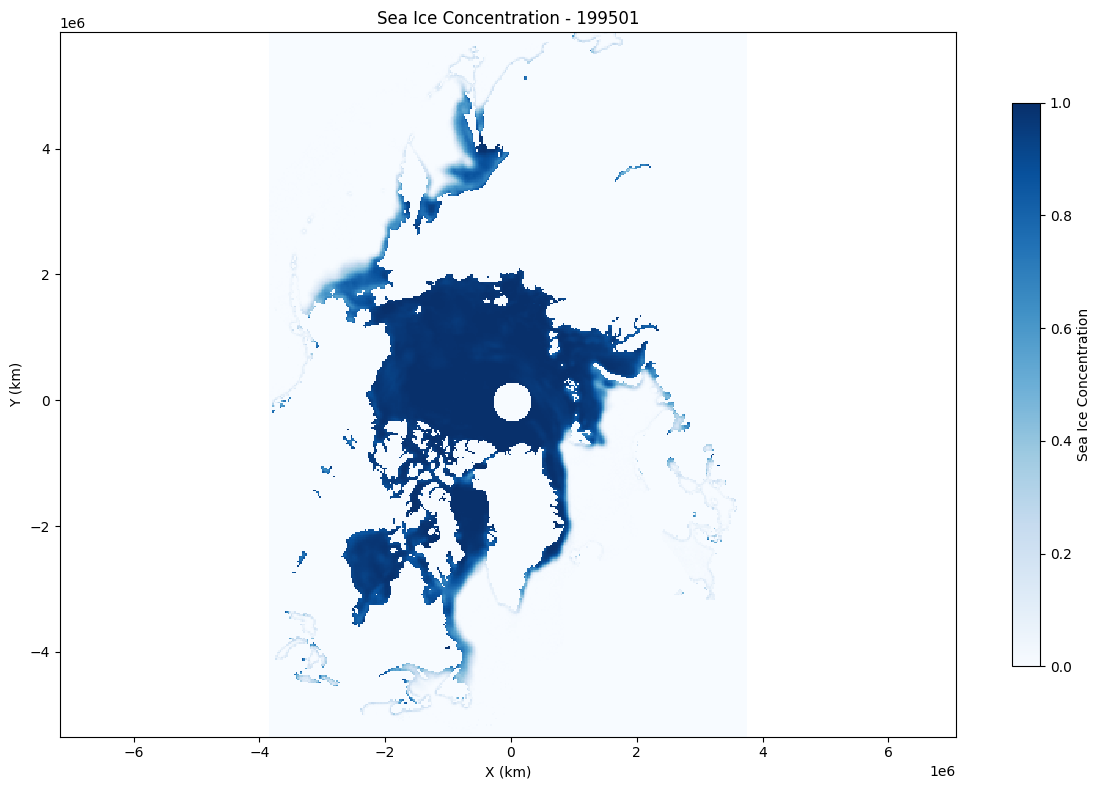

In [12]:
sic_data = loaded_data['sic']
x_coords = loaded_data['x'] 
y_coords = loaded_data['y']
date_info = loaded_data['dates']

plt.figure(figsize=(12, 8))

time_idx = 0
sic_plot = sic_data[time_idx]

X, Y = np.meshgrid(x_coords, y_coords)
im = plt.pcolormesh(X, Y, sic_plot, cmap='Blues', vmin=0, vmax=1, shading='auto')

plt.colorbar(im, label='Sea Ice Concentration', shrink=0.8)
plt.title(f'Sea Ice Concentration - {dates[time_idx]}')
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.axis('equal')
plt.tight_layout()
plt.show()

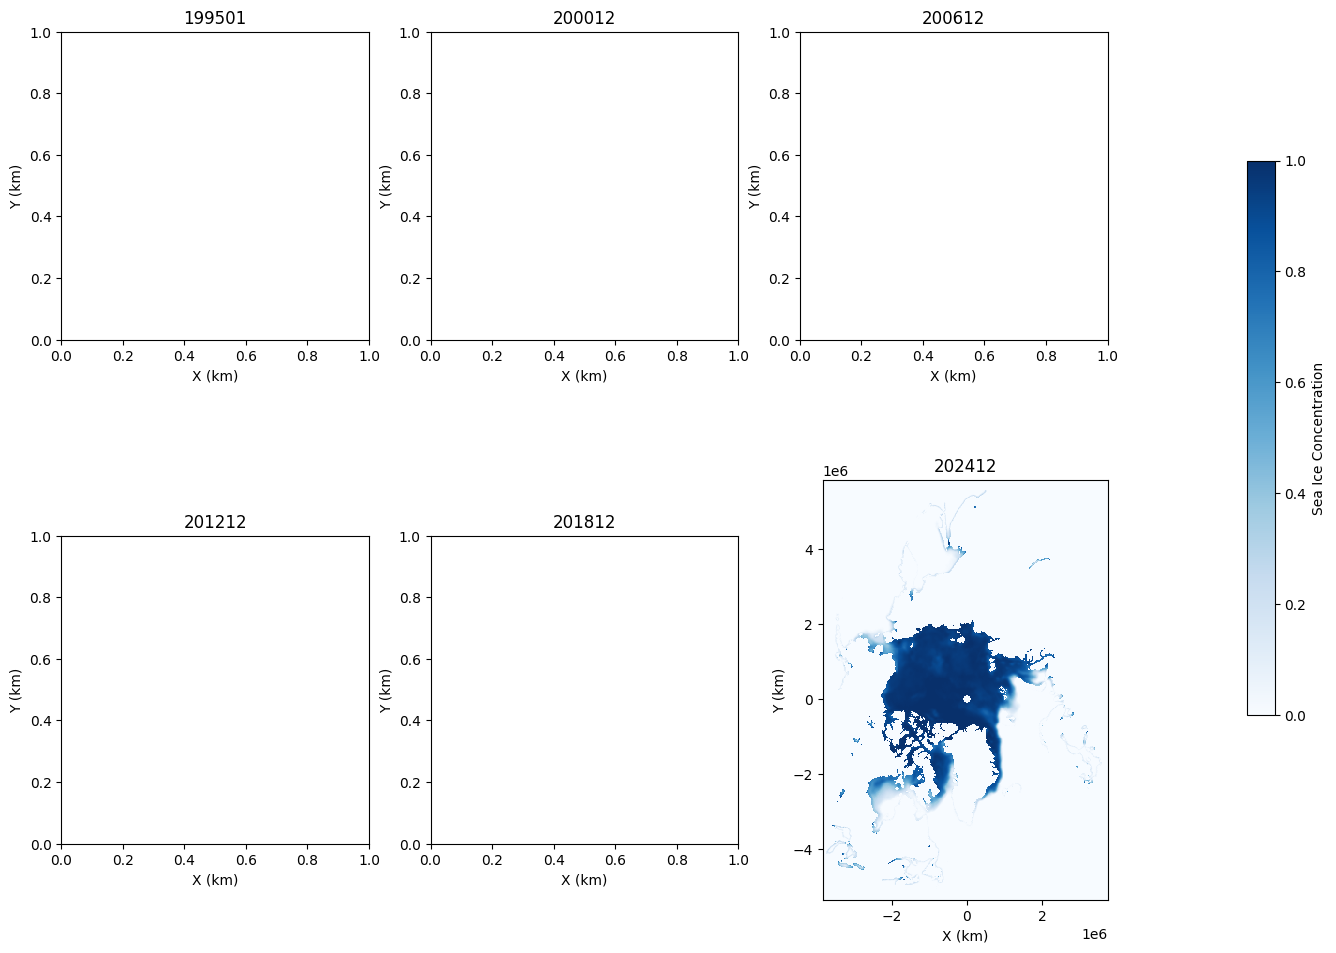

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

time_indices = np.linspace(0, len(sic_data) - 1, 6, dtype=int)

for i, time_idx in enumerate(time_indices):
    ax = axes[i]
    sic_plot = sic_data[time_idx]
    
    im = plt.pcolormesh(X, Y, sic_plot, cmap='Blues', vmin=0, vmax=1, shading='auto')
    
    ax.set_title(f'{dates[time_idx]}')
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
    ax.set_aspect('equal')

# 공통 컬러바 추가
cbar = fig.colorbar(im, ax=axes, shrink=0.6, pad=0.1)
cbar.set_label('Sea Ice Concentration')
plt.show()